# Visualise the observation time series

In [1]:
import myanalysis.visualise

In [2]:
help(myanalysis.visualise.plot_time_series)

Help on function plot_time_series in module myanalysis.visualise:

plot_time_series(working_dir: str, rainfall_filename: str = None, pet_filename: str = None, streamflow_filename: str = None, piezo_level_filename: str = None, plot_filename: str = None, fig_size: tuple = None, start: str = None, end: str = None, rainfall_secondary_frequency: str = None, pet_secondary_frequency: str = None) -> None
    Plot the observations time series against one another in a single
    figure.
    
    :Parameters:
    
        working_dir: `str`
            The file path the working directory where the data is stored
            in the 'data' subdirectory.
    
        rainfall_filename: `str`, optional
            The name of the file containing the rainfall data. If not
            provided, no rainfall data will be plotted.
    
        pet_filename: `str`, optional
            The name of the file containing the potential evapotranspiration
            data. If not provided, no potential evapotran

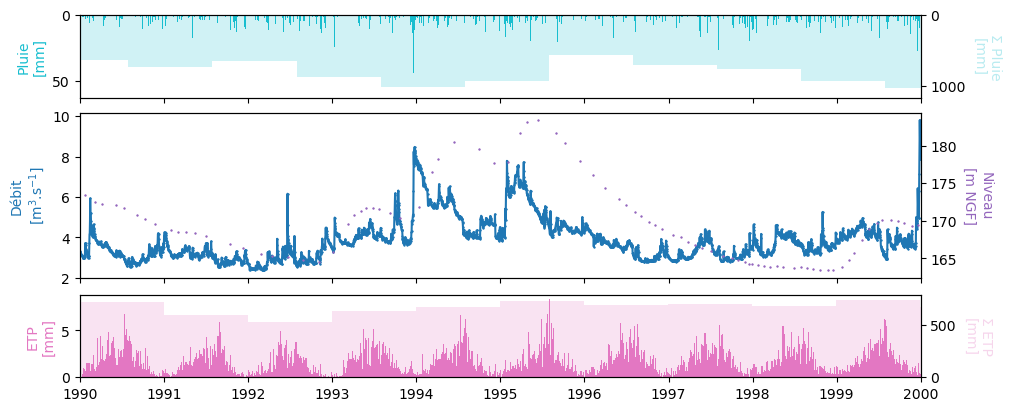

In [3]:
myanalysis.visualise.plot_time_series(
    working_dir='../../examples/my-example',
    rainfall_filename='pluie.prn',
    pet_filename='etp.prn',
    streamflow_filename='debit.prn',
    piezo_level_filename='niveau.prn',
    rainfall_secondary_frequency='A-JUL',
    pet_secondary_frequency='A',
    start='1990-01-01', end='2000-01-01'
)

# Compute correlation between the observation time series

In [4]:
import myanalysis.compare

In [5]:
help(myanalysis.compare.compute_correlation_matrix)

Help on function compute_correlation_matrix in module myanalysis.compare:

compute_correlation_matrix(correlation_coefficient: str, working_dir: str, rainfall_filename: str = None, pet_filename: str = None, streamflow_filename: str = None, piezo_level_filename: str = None) -> pandas.core.frame.DataFrame
    Compute the correlation between the given observations time series.
    
    :Parameters:
    
        correlation_coefficient: `str`
            The correlation coefficient to use. It can either be 'pearson'
             or 'spearman'.
    
        working_dir: `str`
            The file path the working directory where the data is stored
            in the 'data' subdirectory.
    
        rainfall_filename: `str`, optional
            The name of the file containing the rainfall data. If not
            provided, no rainfall data entry will be included in the
            returned correlation matrix.
    
        pet_filename: `str`, optional
            The name of the file conta

In [6]:
myanalysis.compare.compute_correlation_matrix(
    correlation_coefficient='pearson',
    working_dir='../../examples/my-example',
    rainfall_filename='pluie.prn',
    pet_filename='etp.prn',
    streamflow_filename='debit.prn',
    piezo_level_filename='niveau.prn'
)

,P,ETP,Q,Z
P,1.000000,-0.125141,0.100377,0.037956
ETP,-0.125141,1.000000,-0.023771,0.120732
Q,0.100377,-0.023771,1.000000,0.701150
Z,0.037956,0.120732,0.701150,1.000000
